2.1


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lenna.png to Lenna (1).png


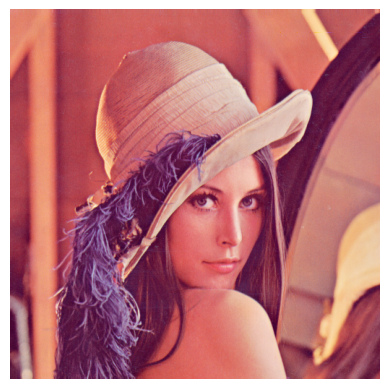

In [ ]:
# Read image
image_path = "Lenna.png"
img = Image.open(image_path)

# Display image using Pillow
img.show()

# Display image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

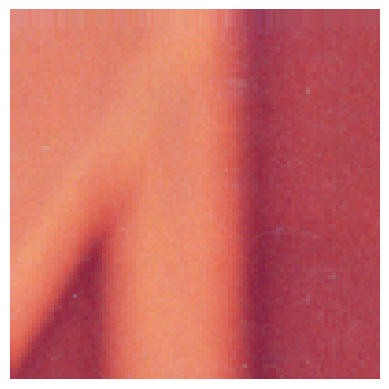

In [ ]:
import numpy as np

# Convert image to NumPy array
img_array = np.array(img)

# Extract top-left corner (100x100 pixels)
top_left_corner = img_array[:100, :100, :]

# Display using Matplotlib
plt.imshow(top_left_corner)
plt.axis('off')
plt.show()

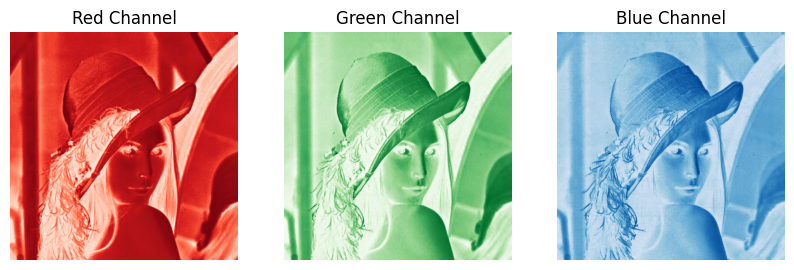

In [ ]:
# Separate RGB channels
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# Display each channel
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

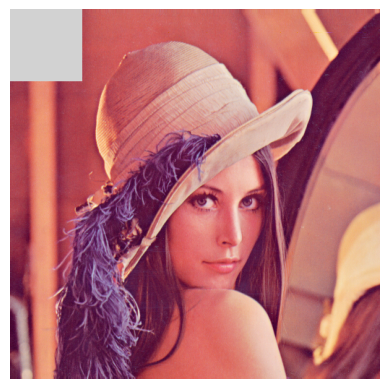

In [ ]:
# Modify top 100x100 pixels to value 210
img_array[:100, :100, :] = [210, 210, 210]

# Display modified image
plt.imshow(img_array)
plt.axis('off')
plt.show()

2.2


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cameraman.png to cameraman.png


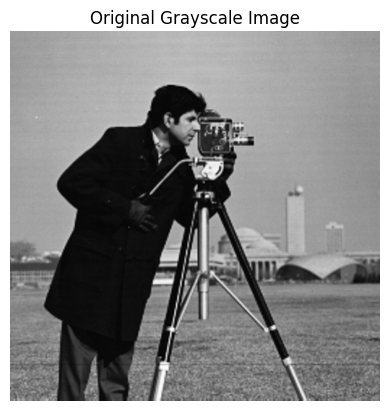

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the grayscale image using Pillow
image_path = "cameraman.png"
gray_image = Image.open(image_path).convert("L")  # Convert to grayscale

# Display the grayscale image
plt.imshow(gray_image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

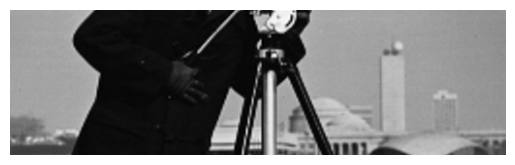

In [ ]:
# Convert grayscale image to NumPy array
image_array = np.array(gray_image)
height, width = image_array.shape

# Extract the middle 150-pixel section
start_y = (height - 150) // 2  # Calculate the start index
cropped_image = image_array[start_y:start_y+150, :]  # Crop 150 pixels

# Display the cropped image
plt.imshow(cropped_image, cmap="gray")
plt.axis("off")
plt.show()

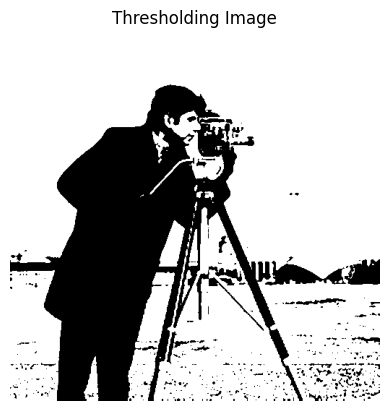

In [ ]:
# Apply thresholding: Pixel values below 100 → 0, above 100 → 255
threshold_value = 100
binary_image = np.where(image_array < threshold_value, 0, 255).astype(np.uint8)

# Display the binary image
plt.imshow(binary_image, cmap="gray")
plt.title("Thresholding Image")
plt.axis("off")
plt.show()

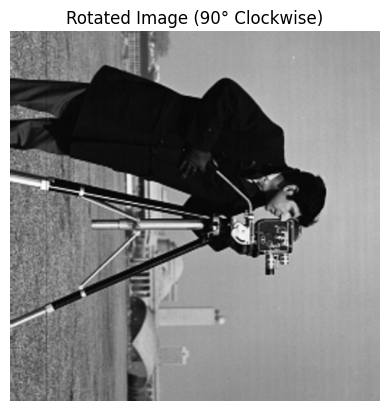

In [ ]:
# Rotate the image 90 degrees clockwise using NumPy
rotated_image = np.rot90(image_array, k=3)  # k=3 rotates 90° clockwise

# Display the rotated image
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

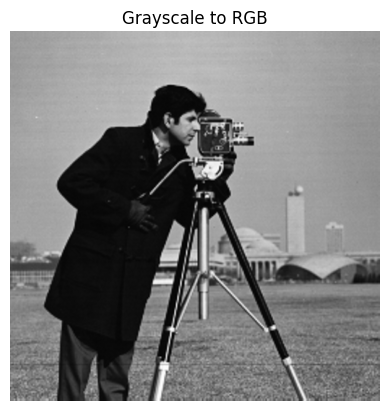

In [ ]:
# Convert grayscale to RGB by stacking three channels
rgb_image = np.stack((image_array,)*3, axis=-1)

# Display the RGB image
plt.imshow(rgb_image)
plt.title("Grayscale to RGB")
plt.axis("off")
plt.show()

3

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Lenna.png to Lenna (2).png


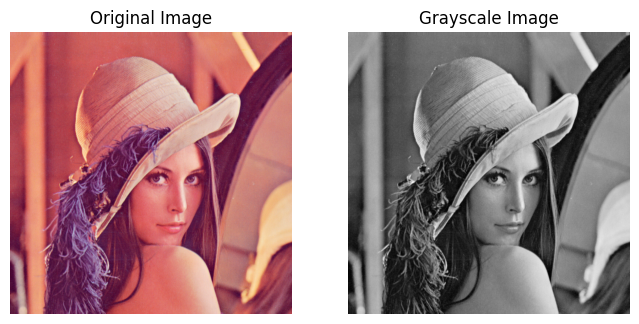

Covariance matrix shape: ()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

image_path = 'Lenna.png'
image = io.imread(image_path)

# Convert image to grayscale if it's a color image
if image.shape[-1] == 3:
    image_gray = color.rgb2gray(image)
else:
    image_gray = image

# Display the original image and grayscale image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

# Flatten the image into a 1D array for PCA
image_flat = image_gray.flatten().astype(float)

# Standardize the data (centering the dataset)
scaler = StandardScaler()
image_scaled = scaler.fit_transform(image_flat.reshape(-1, 1)).flatten()

# Calculate the covariance matrix of the standardized data
cov_matrix = np.cov(image_scaled)

# Verify the shape of the covariance matrix
print(f"Covariance matrix shape: {cov_matrix.shape}")

In [ ]:
# Reshape the scaled image to a 2D array
image_reshaped = image_gray.reshape(-1, image_gray.shape[1])
image_standardized = StandardScaler().fit_transform(image_reshaped)

# Calculate the covariance matrix of the standardized data
cov_matrix = np.cov(image_standardized, rowvar=False)  # rowvar=False is important!

print(f"Covariance matrix shape: {cov_matrix.shape}")

# Compute eigenvalues and eigenvectors correctly
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Verify shapes
print(f"Eigenvalues shape: {eigenvalues.shape}")
print(f"Eigenvectors shape: {eigenvectors.shape}")


Covariance matrix shape: (512, 512)
Eigenvalues shape: (512,)
Eigenvectors shape: (512, 512)


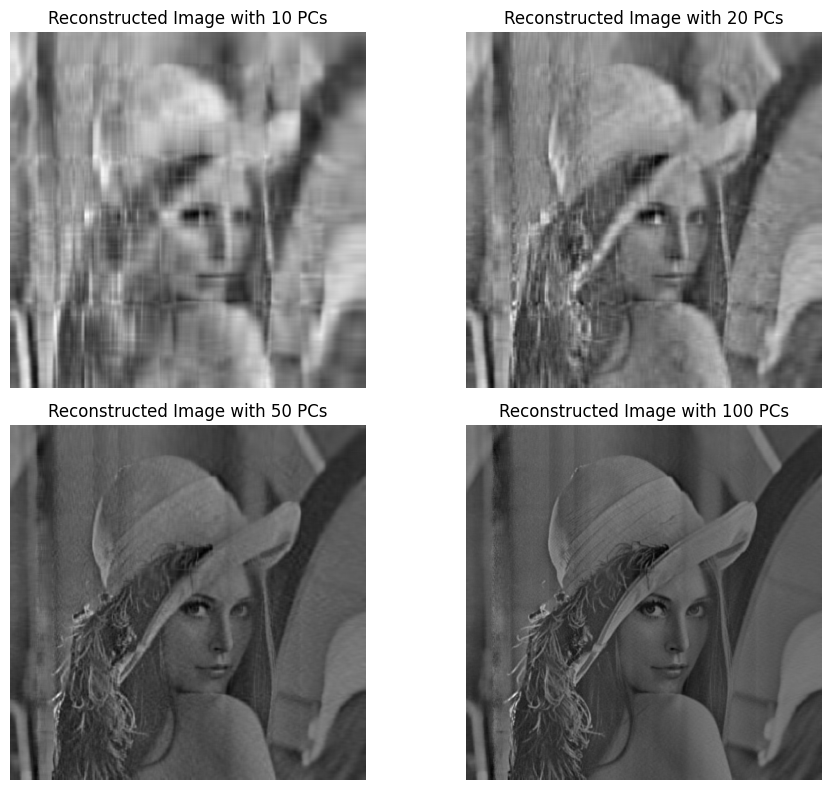

In [ ]:
def reconstruct_image(components):
    # Select top k eigenvectors
    selected_eigenvectors = eigenvectors[:, :components]

    # Reshape the scaled image to match the expected input shape
    image_standardized_reshaped = image_standardized.reshape(-1, image_standardized.shape[1])

    # Project data onto selected principal components
    projected_data = np.dot(image_standardized_reshaped, selected_eigenvectors)

    # Reconstruct the image from projected data
    reconstructed_image_scaled = np.dot(projected_data, selected_eigenvectors.T)

    # Inverse transform and reshape to the original image dimensions
    reconstructed_image = scaler.inverse_transform(reconstructed_image_scaled).reshape(image_gray.shape)

    return reconstructed_image

# Experiment with different combinations of principal components
num_components_to_test = [10, 20, 50, 100]
plt.figure(figsize=(10, 8))

for i, num_components in enumerate(num_components_to_test):
    reconstructed_image = reconstruct_image(num_components)

    plt.subplot(2, 2, i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image with {num_components} PCs')
    plt.axis('off')

plt.tight_layout()
plt.show()
